# Section 1
## Preparing the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
test = pd.read_table('test.tsv',sep='\s+',header=0).sort_values(['user_id', 'item_id', 'rating', 'timestamp'])
train = pd.read_table('train.tsv',sep='\s+',header=0).sort_values(['user_id', 'item_id', 'rating', 'timestamp'])

In [7]:
def data_cleaning(df, valid_ratings = [1.0, 2.0, 3.0, 4.0, 5.0]):
    df = df.sort_values(['user_id', 'item_id', 'timestamp'], ascending=(True, True, True))

    invalid_entries = df.loc[~df['rating'].isin(valid_ratings)]
    another_invalid = df.loc[(df['user_id'].str.len() != 28) | (df['item_id'].str.len() != 10)]
    if not invalid_entries.empty:
        df.drop(invalid_entries)
    if not another_invalid.empty:
        df.drop(another_invalid)
#    print(df)
    df = df.drop_duplicates(subset=['user_id', 'item_id'], keep='last') # check if user has rated an item twice. we keep the latest rating (it's sorted by timestamp)
    print(df)
    return df
train = data_cleaning(train)
test = data_cleaning(test)
#test = test.loc[test['user_id'].isin(train['user_id'])] # double check. only one way though

          item_id                       user_id  rating      timestamp
6582   B005M0MUQK  AE23LDQTB7L76AP6E6WPBFVYL5DA     4.0  1523727684523
7338   B007T8CUNG  AE23LDQTB7L76AP6E6WPBFVYL5DA     5.0  1538338679388
5709   B015IJIO5U  AE23LDQTB7L76AP6E6WPBFVYL5DA     5.0  1550441940530
8394   B09NLV5LBK  AE23LDQTB7L76AP6E6WPBFVYL5DA     5.0  1565530500329
10866  B0BSR996X8  AE23LDQTB7L76AP6E6WPBFVYL5DA     5.0  1565529596545
...           ...                           ...     ...            ...
7095   B0928H8KFQ  AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ     1.0  1567116669646
6145   B09396NY1C  AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ     1.0  1507288252495
10394  B095XZJ99J  AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ     5.0  1551528681939
5962   B09QZJ57YW  AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ     4.0  1563049606419
9381   B0B8F6LD9F  AHZYZ2BUDD7WAJPW5G6K2DK5LYPQ     5.0  1567116785940

[9913 rows x 4 columns]
         item_id                       user_id  rating      timestamp
2117  B008BPI2OW  AE23LDQTB7L76AP6E6WPBFVYL5DA     5.

# User and item statistics

In [8]:
user_rating_distributions = train.groupby('user_id').agg(
    train_rating_mean=('rating', 'mean'),
    train_rating_var=('rating', 'var'),
    train_rating_count=('rating', 'count')
)
item_rating_distributions = train.groupby('item_id').agg(
    train_rating_mean=('rating', 'mean'),
    train_rating_var=('rating', 'var'),
    train_rating_count=('rating', 'count')
)

df_sorted = user_rating_distributions.sort_values('train_rating_count', ascending=False)


total_reviews = df_sorted['train_rating_count'].sum()


cumulative_reviews = df_sorted['train_rating_count'].cumsum()

# Find the minimum number of items needed to reach at least 50% of total reviews
threshold = total_reviews * 0.5
num_items = np.argmax(cumulative_reviews >= threshold) + 1  # +1 to convert zero-indexed position to count

print("Number of users accounting for at least 50% of reviews:", num_items)


df_sorted = item_rating_distributions.sort_values('train_rating_count', ascending=False)

# Calculate total reviews
total_reviews = df_sorted['train_rating_count'].sum()

# Compute cumulative sum of reviews
cumulative_reviews = df_sorted['train_rating_count'].cumsum()

# Find the minimum number of items needed to reach at least 50% of total reviews
threshold = total_reviews * 0.5
num_items = np.argmax(cumulative_reviews >= threshold) + 1  # +1 to convert zero-indexed position to count

print("Number of items accounting for at least 50% of reviews:", num_items)


Number of users accounting for at least 50% of reviews: 279
Number of items accounting for at least 50% of reviews: 111


In [9]:
item_rating_distributions.sort_values('train_rating_count', ascending=False)[:30]
sum(item_rating_distributions.sort_values('train_rating_count', ascending=False)['train_rating_count'][:120]
)

5160

In [10]:
item_rating_distributions.sort_values('train_rating_count', ascending=False)

,train_rating_mean,train_rating_var,train_rating_count
item_id,,,
B0BSGM6CQ9,4.689873,0.533782,158
B0BPJ4Q6FJ,4.737179,0.427254,156
B09857JRP2,4.769231,0.333694,143
B0BCK6L7S5,4.303030,1.189914,132
B08R5GM6YB,4.504065,0.891377,123
...,...,...,...
B0C5CTX5LZ,5.000000,NaN,1
B07DVX841V,5.000000,NaN,1
B0B2LMZ9RT,4.000000,NaN,1


In [ ]:
train.to_csv('train_new.tsv', sep='\t', index=False)
test.to_csv('test_new.tsv', sep='\t', index=False)

In [12]:
print(user_rating_distributions['train_rating_count'].mean())
print(f"The distribution of ratings over users is N({round(user_rating_distributions['train_rating_mean'].mean(), 2)},{round(user_rating_distributions['train_rating_var'].mean(), 2)}). On average, a user has reviewed a product {user_rating_distributions['train_rating_count'].mean()} times.")

12.39125
The distribution of ratings over users is N(4.54,0.69). On average, a user has reviewed a product 12.39125 times.


In [13]:
print(item_rating_distributions['train_rating_count'].mean())
print(f"The distribution of ratings over items is N({round(item_rating_distributions['train_rating_mean'].mean(), 2)},{round(item_rating_distributions['train_rating_var'].mean(), 2)}). On average, an item have been reviewed {item_rating_distributions['train_rating_count'].mean()} times.")

19.475442043222003
The distribution of ratings over items is N(4.52,0.8). On average, an item have been reviewed 19.475442043222003 times.


### The ratings are skewed torwards the lower part, with many people rating stuff very high.

In [14]:
user_rating_distributions.sort_values(by='train_rating_count', ascending=False)


,train_rating_mean,train_rating_var,train_rating_count
user_id,,,
AF7CC34DK36SQJS7WXI44DREGWJA,4.791667,0.210993,48
AFJQQWO6VAZCTTY3GXNB3SEUU34Q,4.627907,0.239203,43
AG5ZVXXHEXDYUUODSEQC4XXV7DPA,4.860465,0.170543,43
AGVT5E2C6WNOCFYSLOCPAPBJOIKQ,2.829268,1.445122,41
AG4ZLTRHVAZRU33BPY5Y643IZXPQ,4.750000,0.243590,40
...,...,...,...
AEXXX2MQRH3AHZMBZBP4RDNGRRWQ,5.000000,NaN,1
AFGJ42MV2H2CHEZNN3JPQ3RSYUHQ,5.000000,NaN,1
AFFOT7AORQAWKU6KKPDHR3FOA5AA,5.000000,NaN,1


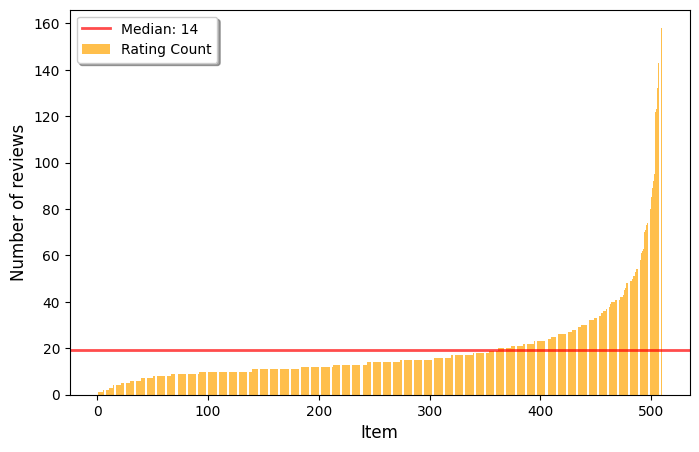

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

y = item_rating_distributions['train_rating_count'].sort_values(ascending=True)

plt.bar([i + 1 for i in range(len(y))], y, label="Rating Count", color="orange", alpha=0.7)

mean_val = np.mean(y)
median_val = np.median(y)
plt.axhline(mean_val, color='red', linestyle='-', linewidth=2, label=f'Median: {median_val:.0f}', alpha=0.7)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)

plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=10)

plt.savefig('item_rating_distribution.png')
plt.show()


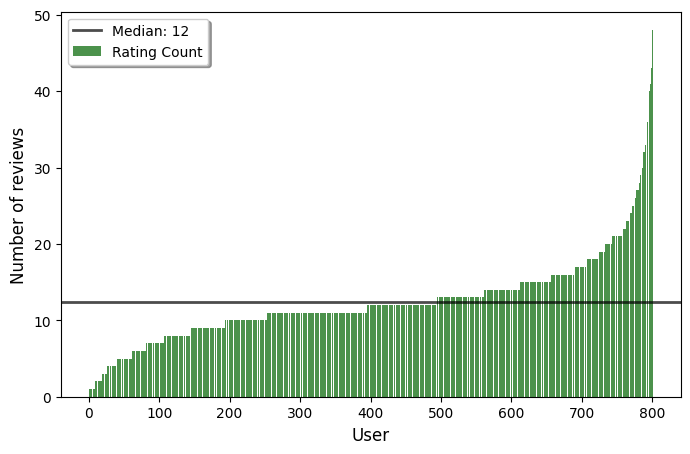

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

y = user_rating_distributions['train_rating_count'].sort_values(ascending=True)

plt.bar([i + 1 for i in range(len(y))], y, label="Rating Count", color="darkgreen", alpha=0.7)

mean_val = np.mean(y)
median_val = np.median(y)
plt.axhline(mean_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.0f}', alpha=0.7)
plt.xlabel('User', fontsize=12)
plt.ylabel('Number of reviews', fontsize=12)

plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=10)

plt.savefig('user_rating_distribution.png')
plt.show()


In [19]:
len(train['item_id'].unique())

509

In [20]:
# Number of observed interactions
num_interactions = len(train)

# Number of unique users and items
num_users = train['user_id'].nunique()
num_items = train['item_id'].nunique()

# Total possible interactions
total_possible = num_users * num_items
print(num_interactions)
# Sparsity
sparsity = 1 - (num_interactions / total_possible)
sparsity

9913


0.9756556974459725

# Frequency and ratings - top 5

In [21]:
freq = train.groupby('item_id')['rating'].apply(
    lambda x: (x >= 3).sum()
    )
new_pd = pd.DataFrame(freq.sort_values(ascending=False)[:10])
new_pd = new_pd.rename(columns={'rating': 'frequency'})
new_pd['average rating'] = item_rating_distributions['train_rating_mean'].reindex(new_pd.index)
new_pd

,frequency,average rating
item_id,,
B0BSGM6CQ9,153,4.689873
B0BPJ4Q6FJ,153,4.737179
B09857JRP2,141,4.769231
B0BCK6L7S5,120,4.303030
B0BTC9YJ2W,119,4.737705
B08R5GM6YB,116,4.504065
B0B95V41NR,92,4.706522
B004XNK7AI,85,4.629213
B08SJY4T7K,84,4.200000
